SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


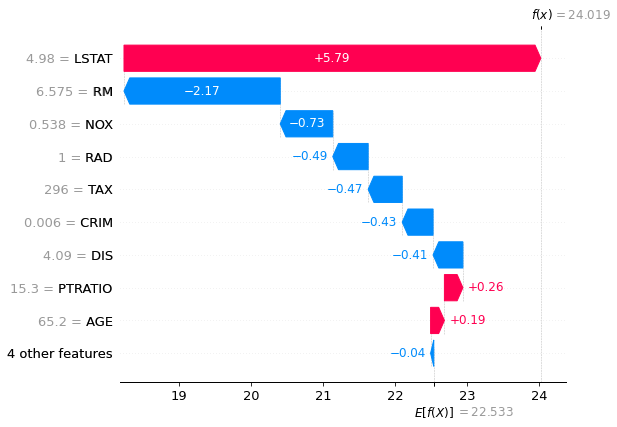

In [1]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [2]:
import pandas as pd
from sklearn import datasets
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
df_wine['target'] = pd.Series(wine_data.target)

In [3]:
from sklearn.model_selection import train_test_split
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Yellowbrick
Таблица корреляции

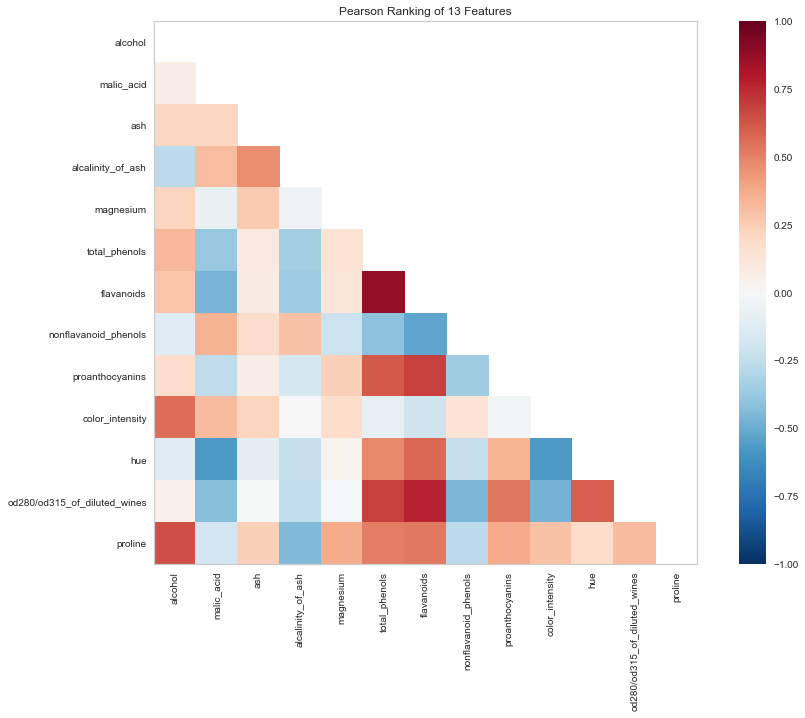

<AxesSubplot:title={'center':'Pearson Ranking of 13 Features'}>

In [4]:
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt
visualizer = Rank2D(algorithm="pearson",  size=(1080, 720))
visualizer.fit_transform(X_train)
visualizer.poof()

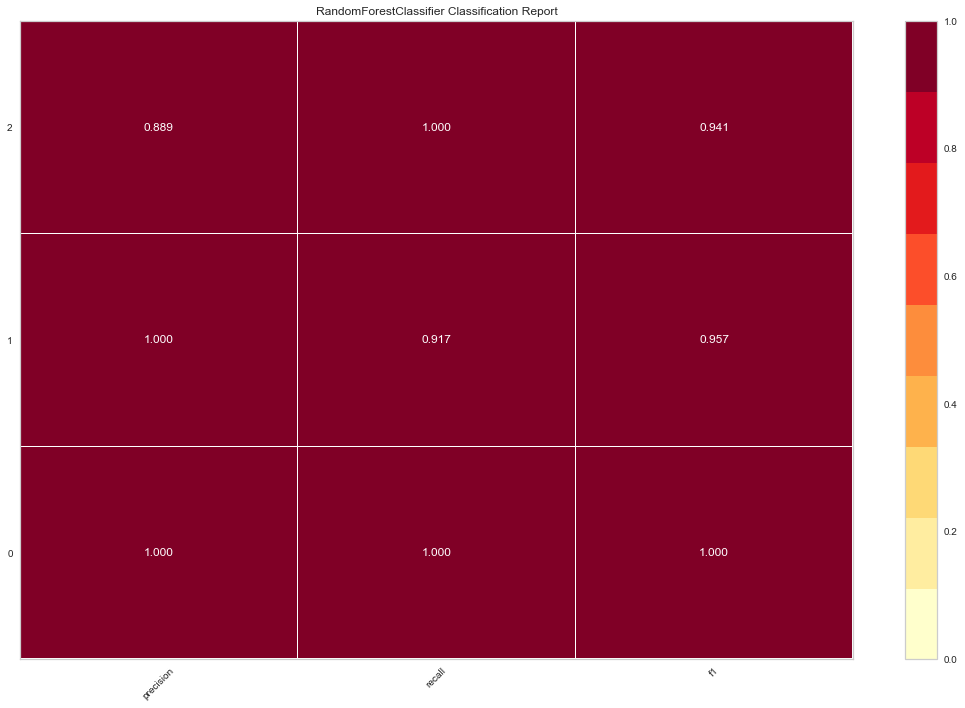

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [5]:
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
visualizer = ClassificationReport(model, size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

ELI5

In [6]:
import eli5
eli5.show_weights(model, feature_names = X.columns.tolist())

Weight,Feature
0.1830 ± 0.3774,proline
0.1727 ± 0.3577,color_intensity
0.1429 ± 0.3621,flavanoids
0.1017 ± 0.2985,hue
0.0987 ± 0.2836,alcohol
0.0983 ± 0.3023,od280/od315_of_diluted_wines
0.0531 ± 0.1817,malic_acid
0.0497 ± 0.2117,total_phenols
0.0371 ± 0.1349,magnesium
0.0242 ± 0.1040,alcalinity_of_ash


In [7]:
from eli5 import show_prediction
show_prediction(model, X_train.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

LIME

In [8]:
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=y_train.unique())

In [9]:
predict_fn = lambda x: model.predict_proba(x).astype(float)

In [10]:
exp = explainer.explain_instance(X_test.values[0], predict_fn, num_features=6)
exp.show_in_notebook(show_all=False)

MLxtend

In [11]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train_ml = X_train[['proline', 'color_intensity']].values
y_train_ml = y_train.values

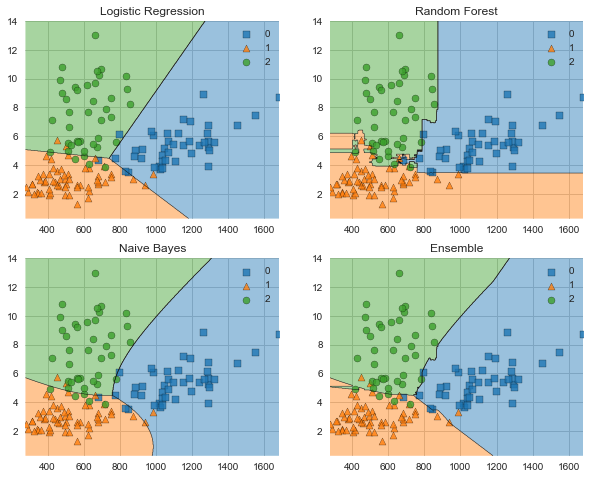

In [13]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)